<a href="https://colab.research.google.com/github/w21280485/assignment_a2_2/blob/main/Cardiovascular_Health_Analysis_Wong21280485.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Health Business Analysis Report**

##Introduction

This business report provides a comprehensive Cardiovascular Health Business Analysis.
The 6-step problem solving methodology will be used. Considering the purpose of this business report is to analyze and visualize the data and interact with client, some of the steps related to algorithm development and coding are processed and addressed in the Code Development Notebook.

6-step problem solving methodology:
1. Problem Statement
2. Describe the input and output information
3. Work the problem by hand
4. Develop an algorithm
5. Convert to python code - Data Analysis
6. Test solution with a variety of data


## Problem Statement

This business report is to investigate the connection between cardiovascular health and the factors of lifestyle habits and medical history. Lifestyle habits include smoking and physical activity habits, while medical history includes BMI and Cholestyerol level. The findings aim to provide valuable insight to individuals and encoruarge them to take proative actions to reduce the risk of getting cardiovascular diseases.

Four data analysis towards the occuranace of cardio diseases will need to be completed as below:
1. Investigate gender
2. Explore BMI (Body Mass Index)
3. Analyze BMI and Cholesterol
4. Study the connection between Smoking and physical activity


## Input and output information

###Inputs:

cardiohealth dataset as SQLite database

###Outputs:

Data Analysis 1: Analysing Cardiovascular Health by Gender ((1 for female, 2 for male)
*   a) Data distribution
*   b) Visualization
*   c) Discussion

Data Analysis 2:Analysing Cardiovascular Health by BMI (Body Mass Index)
*   a) Data distribution
*   b) Visualization
*   c) Discussion

Data Analysis 3: Exploring the relationship between BMI and Cholesterol among those with Cardio diseases
*   a) Data distribution
*   b) Visualization
*   c) Discussion

Data Analysis 4: Studying the connection between Smoking and physical activity among those with Cardio diseases
*   a) Data distribution
*   b) Visualization
*   c) Discussion







## Work the problem by hand

Select first 10 rows of dataset as sample data:

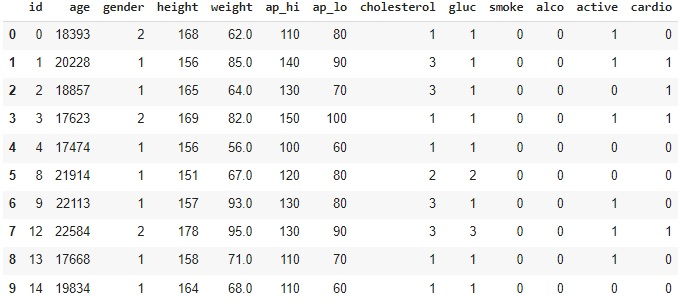



### 1. Gender:




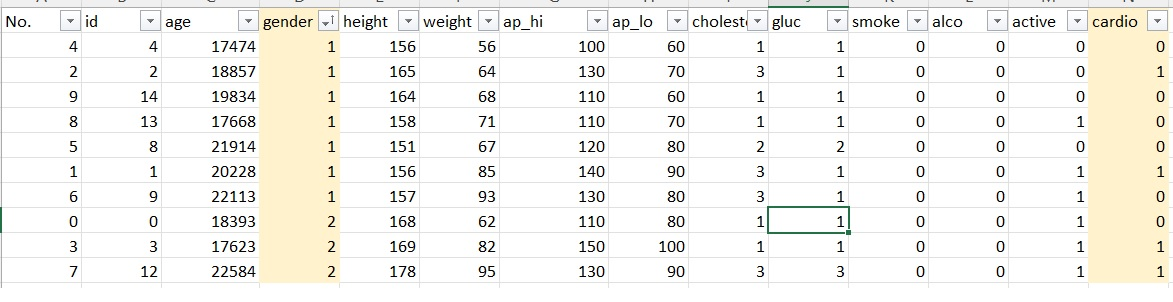

2 out of 7 female (gender 1) and 2 out of 3 male (gender 2) have cardio diseases. It appears male is easier to have cardio diseases then female.


### 2. BMI:

BMI = weight in kg / height in m square

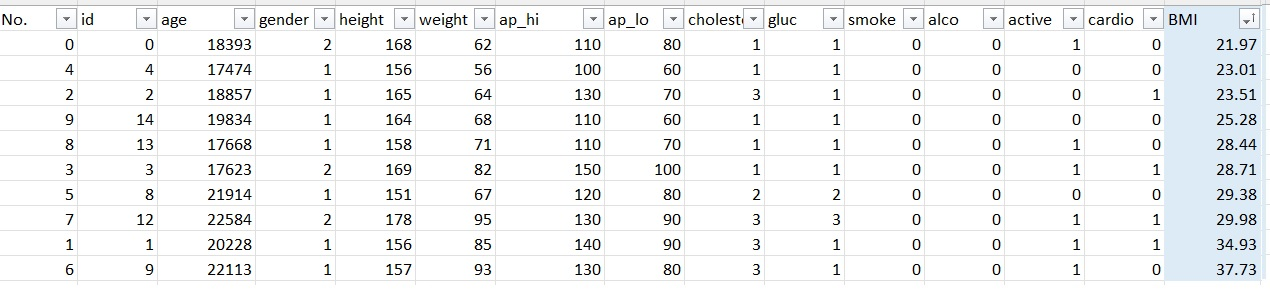

Only 1 person has cardio diseases among 5 lowest BMI sample. 3 people have cardio diseases among 5 highest BMI sample. It appears higher BMI tends to have more cardio diseases.

### 3. BMI & Cholesterol:

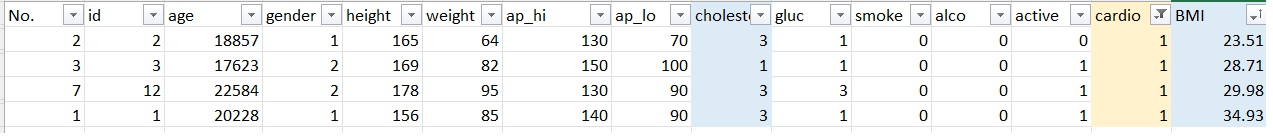

Among those with Cardio diseases, all sample under BMI range Obese (>29.9) is having Cholesterol well above normal level (3).


### 4. Smoking and physical activity:

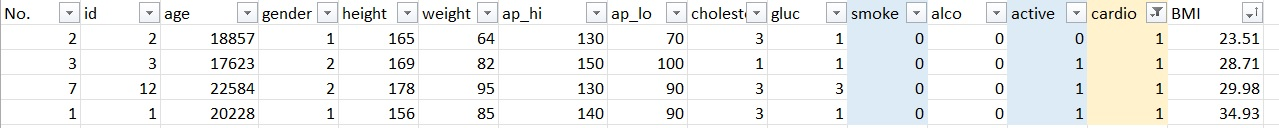

Among those with Cardio diseases, cannot see any trend o relationship from this sample abecause all sample are non-smoker


##Develop an algorithm

### 1. Inspect the dataset:

*   Import SQLite library
*   Import pandas library
*   Upload the 'cardiohealth' dataset and create connection to database
*   Find out what tables exist
*   Load the table into Pandas dataframe

-->Refer to Code_Development_Notebook

### 2. Perform data exploration:

*   Display the data (first 10 rows, tail 10 rows, general info, statistic description)
*   Discussion if spot any abnormal value

-->Refer to Code_Development_Notebook

### 3. Clean data:

*  Check for unknown values and impute/remove
*  Check for duplicates and remove duplicates
*  Check for missing values and impute/remove
*  Load dataset with filter (if required)
*  Replace values with meaningful labels

-->Refer to Code_Development_Notebook

### 4. Data Analysis 1: Cardio & Gender
*  Calculate the count of cardio diseases
*  Calculate the count of gender
*  Group both data
*  Display the dataframe
*  Import matplotlib
*  Create group bar chart
*  Display the plot
*  Provide discussion and insight


### 5. Data Analysis 2: Cardio & BMI

*  Calculate BMI
*  Group BMI into categories
*  Group Cardio & BMI category data
*  Display the dataframe
*  Import matplotlib
*  Create group bar chart
*  Display the plot
*  Provide discussion and insight


### 6. Data Analysis 3: BMI and Cholesterol among Cardio diseases
*  Only select cardio data with cardio diseases = YES
*  Calculate BMI
*  Group BMI into categories
*  Group Cardio & BMI category data
*  Display the dataframe
*  Import matplotlib
*  Create group bar chart
*  Display the plot
*  Provide discussion and insight


### 7. Data Analysis 4: Smoking and Physical activity among Cardio diseases
*  Only select cardio data with cardio diseases = YES
*  Calculate Smoking
*  Calculate Activity
*  Group both data
*  Display the dataframe
*  Import matplotlib
*  Create group bar chart
*  Display the plot
*  Provide discussion and insight





### 8. Close the database connection

## Convert into python code

### Data Analysis 1:  Investigating Cardiovascular Health by Gender

In [2]:
# @title Data distribution

# import libraries
import sqlite3
import pandas as pd

# creating connection to database and cursor
connection = sqlite3.connect('cardiohealth.db')
cursor = connection.cursor()

# load table into dataframe !!only select gender = 1 OR 2 to exclude unknown gender!!
sql='''
SELECT * from medical_examination WHERE gender = 1 OR gender = 2;
'''
df = pd.read_sql_query(sql, connection)

# use the info provided in assignment guideline to replace values with meaningful labels
df['gender'].replace(to_replace=[1,2,3], value=['Female','Male','Unknown'], inplace=True)
df['cholesterol'].replace(to_replace=[1,2,3], value=['Normal','Above normal', 'Well above normal'], inplace=True)
df['gluc'].replace(to_replace=[1,2,3], value=['Normal','Above normal', 'Well above normal'], inplace=True)
df['smoke'].replace(to_replace=[0,1], value=['Non-smoker', 'Smoker'], inplace=True)
df['alco'].replace(to_replace=[0,1], value=['Non-smoker', 'Smoker'], inplace=True)
df['active'].replace(to_replace=[0,1], value=['Inactive', 'Active'], inplace=True)
df['cardio'].replace(to_replace=[0,1], value=['No','Yes'], inplace=True)
df

# Calculate the count of cardio diseases among all genders to understand cardio distribution
cardio_counts = df['cardio'].value_counts()

# Calculate the count of cardio diseases by gender to understand gender distribution
gender_counts = df['gender'].value_counts()

# Group the data by Cardio and Gender
grouped_cardio_gender = df.groupby(['gender','cardio'])
grouped_cardio_gender

# Calculate the count for each group
cardio_gender_counts = grouped_cardio_gender.size()

# Display the resulting DataFrame
cardio_gender_counts

# Reshape the result to have cardio as rows and gender as columns
cardio_gender_counts = cardio_gender_counts.unstack()

# Display the resulting DataFrame
cardio_gender_counts

cardio,No,Yes
gender,,
Female,22909,22613
Male,12105,12362


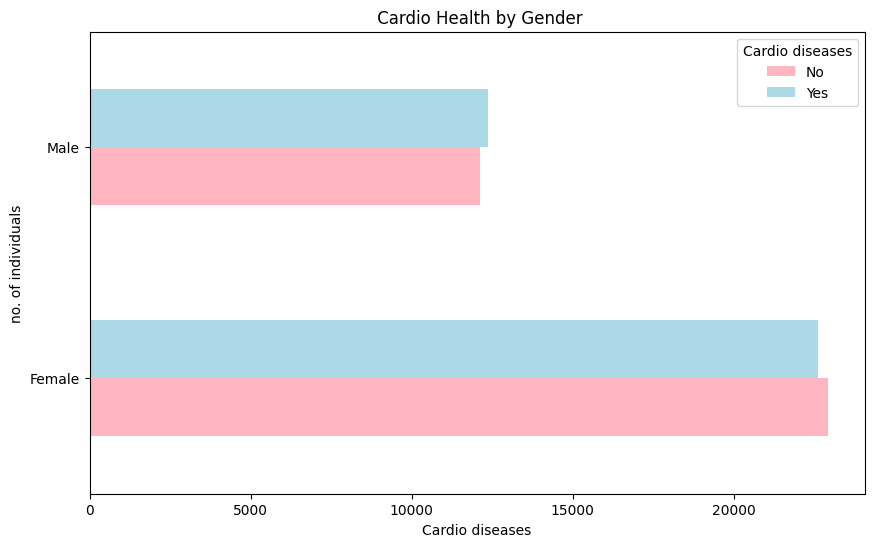

In [12]:
# @title Visualisation

# Import library
import matplotlib.pyplot as plt

# Create a group bar chart
cardio_gender_counts.plot(kind='barh', figsize=(10, 6), color=('lightpink','lightblue'))
plt.title(' Cardio Health by Gender')
plt.xlabel('Cardio diseases')
plt.ylabel('no. of individuals')
plt.xticks(rotation=0)
plt.legend(title='Cardio diseases')

# Display the plot
plt.show()


#### Observation and Discussion:

There are more female than male in the sample data. The occurrence of cardiovascular diseases is more in male than female but the difference is not significant enough to draw a conclusion.

### Data Analysis 2:  Investigating Cardiovascular Health by BMI

In [4]:
# @title Data distribution

# Calculate bmi to understand bmi distribution
bmi_count = df['weight']/((df['height']**2/10000))          # bmi = weight(kg) / height(m)2

# round the number to 2 decimal places
bmi_count = bmi_count.round(1)

# group bmi by groups: underweight = less than 18.5 ; healthy weight = 18.5-24.9 ; overweight = 25-29.9 ; obese = 30 or more
# Define the custom BMI ranges and labels
bins = [0,18.5, 25, 30, 1000]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Use pd.cut to categorize the BMI values
bmi_cat = pd.cut(bmi_count, bins=bins, labels=labels, right=False)

# Group the data by Cardio and bmi_cat
grouped_cardio_bmi = df.groupby([bmi_cat,'cardio'])
grouped_cardio_bmi

# Calculate the count for each group
cardio_bmi_counts = grouped_cardio_bmi.size()

# Reshape the result to have cardio as rows and gender as columns
cardio_bmi_counts = cardio_bmi_counts.unstack()

# Display the resulting DataFrame
cardio_bmi_counts

cardio,No,Yes
Underweight,449,180
Healthy Weight,15131,10082
Overweight,12546,12994
Obese,6888,11719


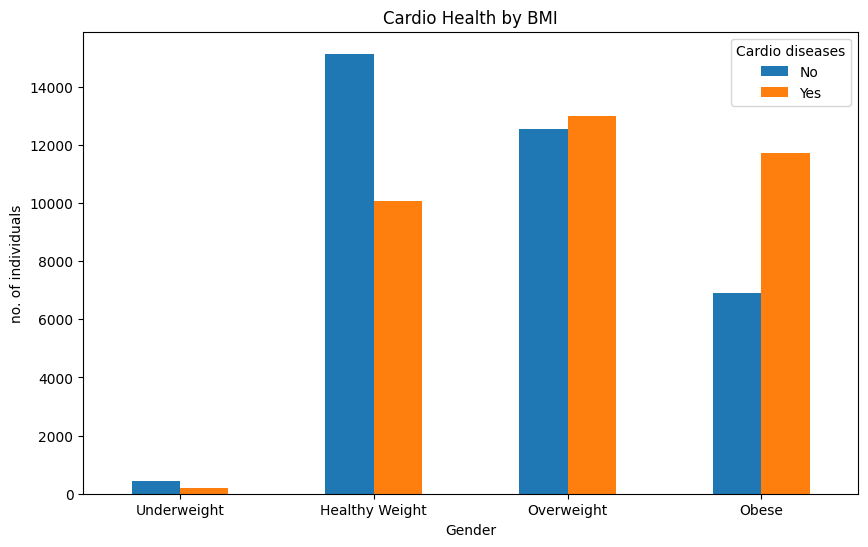

In [13]:
# @title Visualisation

# Create a grouped bar chart
ax = cardio_bmi_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Cardio Health by BMI')
plt.xlabel('Gender')
plt.ylabel('no. of individuals')
plt.legend(title='Cardio diseases', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)

# Display the plot
plt.show()

#### Observation and Discussion:

Individuals with overweight and obese BMI are more likely to have cardio dieases. Moreover, a higher BMI index increases the likelihood of having cardiovascular diseases.

### Data Analysis 3: Exploring the relationship between BMI and Cholesterol among those with Cardio diseases

In [6]:
# @title Data distribution

# select data where cardio diseases = YES only
df = df[df['cardio'] == 'Yes']

# Calculate bmi
bmi_count_w_cardiodis = df['weight']/((df['height']**2/10000))          # bmi = weight(kg) / height(m)2

# round the number to 2 decimal places
bmi_count_w_cardiodis = bmi_count_w_cardiodis.round(1)

# group bmi by groups: underweight = less than 18.5 ; healthy weight = 18.5-24.9 ; overweight = 25-29.9 ; obese = 30 or more
# Define the custom BMI ranges and labels
bins = [0,18.5, 25, 30, 100]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

# Use pd.cut to categorize the BMI values
bmi_w_cardiodis_cat = pd.cut(bmi_count_w_cardiodis, bins=bins, labels=labels, right=False)

# Group the data by BMI & cholesterol
grouped_bmi_chole = df.groupby([bmi_w_cardiodis_cat,'cholesterol'])

# Calculate the count for each group
bmi_chole_counts = grouped_bmi_chole.size()

# Reshape the result to have cardio as rows and gender as columns
bmi_chole_counts = bmi_chole_counts.unstack()

# reorder the cholesterol category
bmi_chole_counts = bmi_chole_counts.loc[:,['Normal','Above normal','Well above normal']]

# Display the resulting DataFrame
bmi_chole_counts

cholesterol,Normal,Above normal,Well above normal
Underweight,130,28,22
Healthy Weight,7482,1316,1284
Overweight,8715,2155,2124
Obese,6715,2250,2741


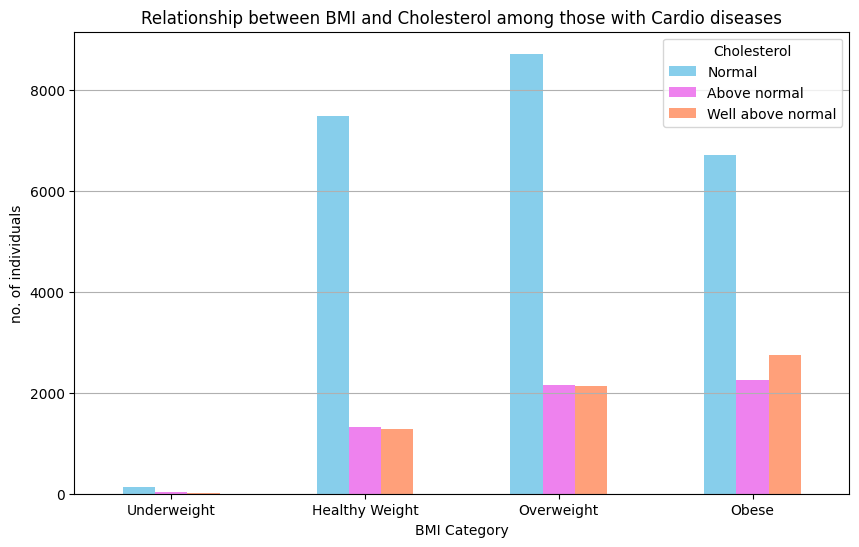

In [14]:
# @title Visualisation

# Create a grouped bar chart
ax = bmi_chole_counts.plot(kind='bar', figsize=(10, 6),color=('skyblue','violet','lightsalmon' ))
plt.title('Relationship between BMI and Cholesterol among those with Cardio diseases')
plt.xlabel('BMI Category')
plt.ylabel('no. of individuals')
plt.legend(title='Cholesterol', loc='upper right', labels=['Normal', 'Above normal','Well above normal'])
plt.xticks(rotation=0)
plt.grid(axis = 'y')

# Display the plot
plt.show()

#### Observation and Discussion:

Among those with cardio diseases,those with underweight & healthy weight BMI tend to have a normal cholesterol level, while those with overweight and obese tend to have more above normal and well above normal cholesterol level. Moreover, in the obese BMI category, well above normal level is more than above normal level.
This implies that a higher BMI is more likely to have a higher cholesterol level.

### Data Analysis 4: Studying the connection between Smoking and physical activity among those with Cardio diseases

In [8]:
# @title Data distribution

# select data where cardio diseases = YES only
df = df[df['cardio'] == 'Yes']

# Group the data by smoking & activity
grouped_smoke_active = df.groupby(['smoke','active'])

# Calculate the count for each group
smoke_active_counts = grouped_smoke_active.size()

# Reshape the result to have cardio as rows and gender as columns
smoke_active_counts = smoke_active_counts.unstack()

# Display the resulting DataFrame
smoke_active_counts

active,Active,Inactive
smoke,,
Non-smoker,25244,6802
Smoker,2371,558


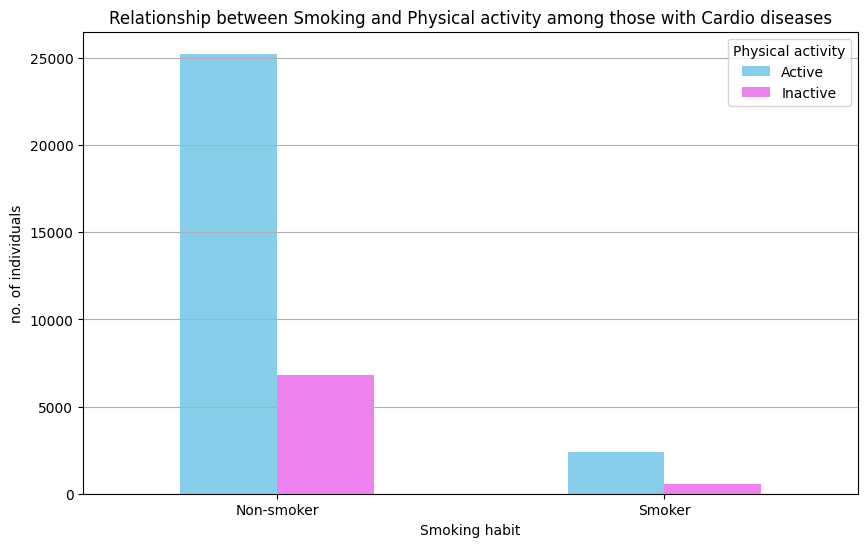

In [15]:
# @title Visualisation

# Create a grouped bar chart
ax = smoke_active_counts.plot(kind='bar', figsize=(10, 6),color=('skyblue','violet','lightsalmon' ))
plt.title('Relationship between Smoking and Physical activity among those with Cardio diseases')
plt.xlabel('Smoking habit')
plt.ylabel('no. of individuals')
plt.legend(title='Physical activity', loc='upper right', labels=['Active','Inactive'])
plt.xticks(rotation=0)
plt.grid(axis = 'y')

# Display the plot
plt.show()

#### Observation and Discussion:

Among those with cardio diseases, non-smokers tend to have more physical activity than smokers.

## Test the data

This part will use Colab form to interact with user to test the BMI calculation.
For the testing on duplicated checking process, please refer to Code_Development_Notebook

In [10]:
# @title BMI calculator

Name = "Mary" # @param {type:"string"}
height_cm = 32 # @param {type:"slider", min:1, max:300, step:1}
weight_kg = 162 # @param {type:"slider", min:1, max:300, step:1}


# Function to calculate BMI
def bmi(height_cm,weight_kg):
 index = weight_kg / (height_cm **2/10000)
 return index

# Function to categorize BMI
def bmi_cat(index):
  if 0 <= index < 18.5:
      category = "Underweight"
  elif 18.5 <= index <= 24.9:
    category = "Healthy weight"
  elif 25 <= index <= 29.9:
    category = "Overweight"
  elif index >= 30:
    category = "Obese"
  return category

# Calculate BMI
calculated_bmi = bmi(height_cm, weight_kg)

# BMI category
bmi_category = bmi_cat(calculated_bmi)

print(f'Name: {Name}')
print(f'Height: {height_cm} cm')
print(f'Weight: {weight_kg} kg')
print(f'Your BMI is {calculated_bmi:.2f}')     # round to 2 decimal places
print(f'Your BMI cateogry is {bmi_category}')

Name: Mary
Height: 32 cm
Weight: 162 kg
Your BMI is 1582.03
Your BMI cateogry is Obese


# Reference Sources

Refer to Department of Health and Aged Care website for BMI measurement:

https://www.health.gov.au/topics/overweight-and-obesity/bmi-and-waist
